<a href="https://colab.research.google.com/github/kanchu9462/Deep-Learning-6--8-pm-Tue-wed/blob/main/Hand_Written_CNN_Digit_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand Written Digit Classification - Kanchan kurhe

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Read the handwritten digit dataset

In [2]:
from keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtest.shape

(10000, 28, 28)

In [5]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Viewing first image from train data

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

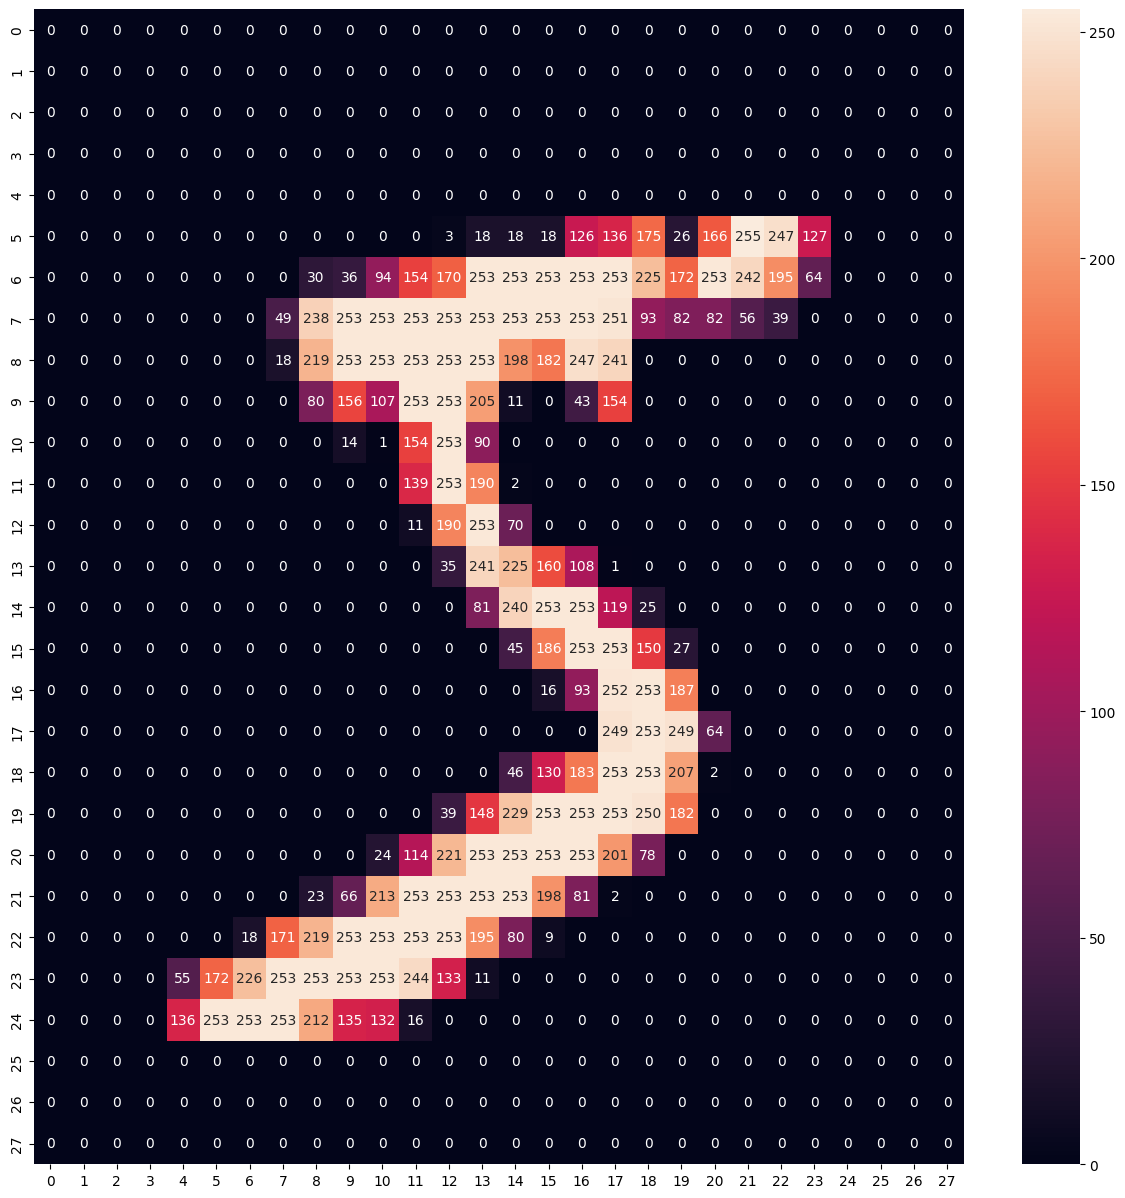

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0],annot=True,fmt='d')
plt.show()

In [9]:
ytrain[0]

5

In [10]:
xtrain[0].shape

(28, 28)

# Visulaize top 9 images from xtrain data

In [11]:
for i in range(9):
  print(i)

0
1
2
3
4
5
6
7
8


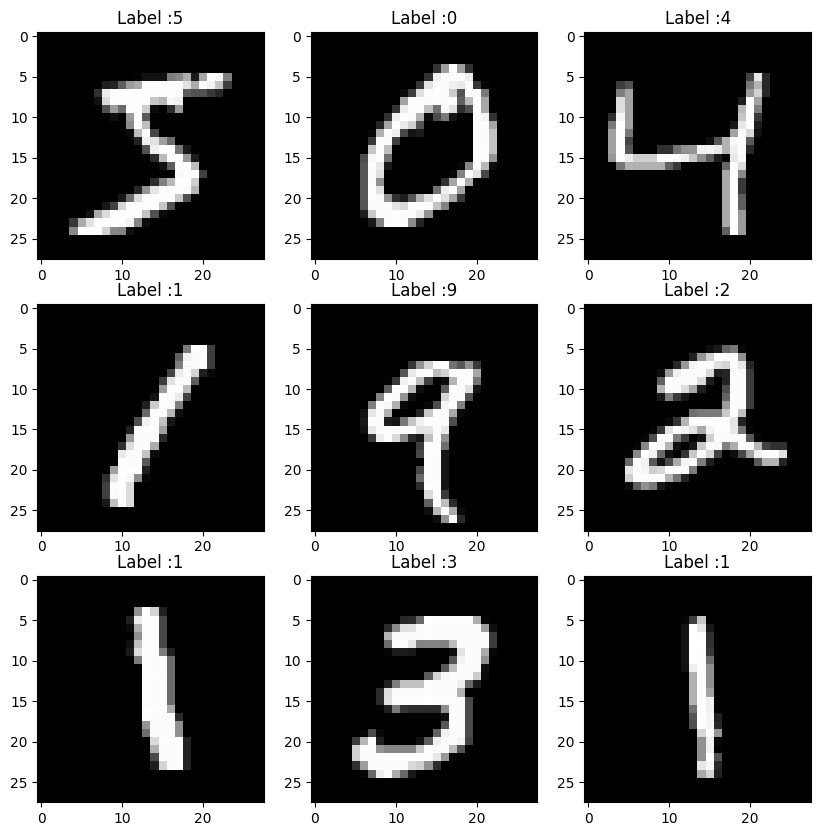

In [12]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(xtrain[i],cmap='gray')
  plt.title(f'Label :{ytrain[i]}')

In [13]:
import numpy as np

np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
len(np.unique(ytrain))


10

Because i have more than 2 classes above becomes a multiclass classification **problem**

# Processing the data

In [15]:
xtrain_scl=xtrain.astype('float32')/255
xtest_scl=xtest.astype('float32')/255

In [16]:
from keras.utils import to_categorical
ytrain_cat =to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [17]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [18]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [19]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# Create a Simple Convet

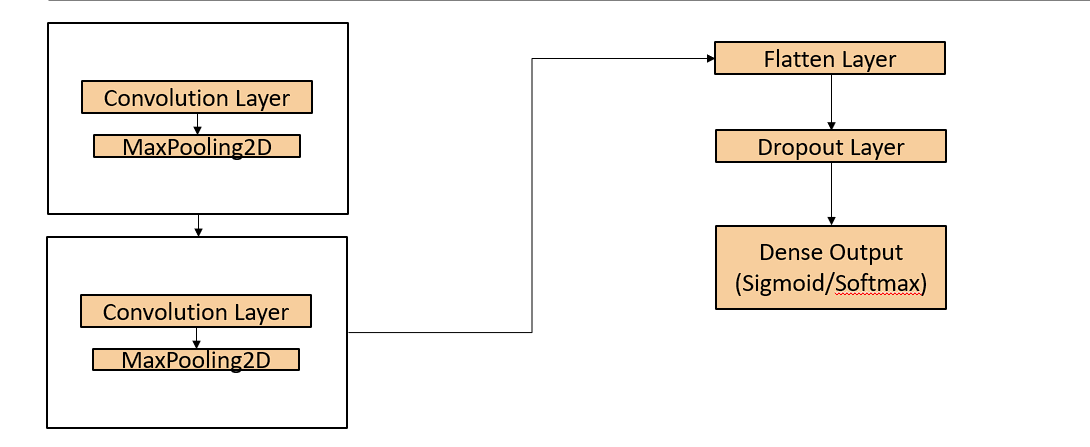

# Summary of Activation Function with Loss function

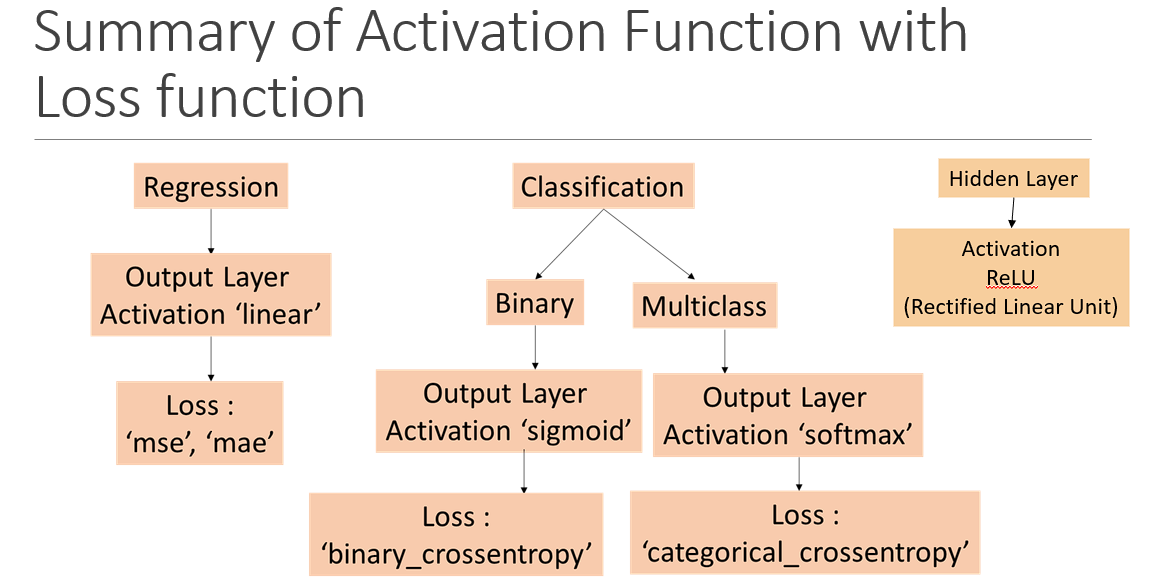

In [21]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dropout, Dense


In [22]:

model = Sequential()

# Add Input layer
model.add(Input(shape=(28, 28, 1)))
# Add convolution layer 1
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
# Add Maxpooling 1
model.add(MaxPool2D(pool_size=(2,2)))
# Add convolution layer 2
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# Add Max Pooling 2
model.add(MaxPool2D(pool_size=(2,2)))
# Add flatten layer
model.add(Flatten())
# Dropout layer
model.add(Dropout(rate=0.5))
# Dense layer Multiclass- Softmax
model.add(Dense(units=10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

# Compile the model

In [25]:


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Train the neural net

In [26]:
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.1, epochs=15)

Epoch 1/15
1688/1688 [==============================] - 13s 4ms/step - loss: 0.2280 - accuracy: 0.9286 - val_loss: 0.0644 - val_accuracy: 0.9808
Epoch 2/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0863 - accuracy: 0.9732 - val_loss: 0.0473 - val_accuracy: 0.9872
Epoch 3/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0678 - accuracy: 0.9790 - val_loss: 0.0372 - val_accuracy: 0.9890
Epoch 4/15
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0580 - accuracy: 0.9813 - val_loss: 0.0342 - val_accuracy: 0.9897
Epoch 5/15
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0513 - accuracy: 0.9839 - val_loss: 0.0323 - val_accuracy: 0.9922
Epoch 6/15
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0460 - accuracy: 0.9854 - val_loss: 0.0285 - val_accuracy: 0.9913
Epoch 7/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0440 - accuracy: 0.9859 - val_loss: 0.0300 - val_accuracy

# Plot the learning curve for the model

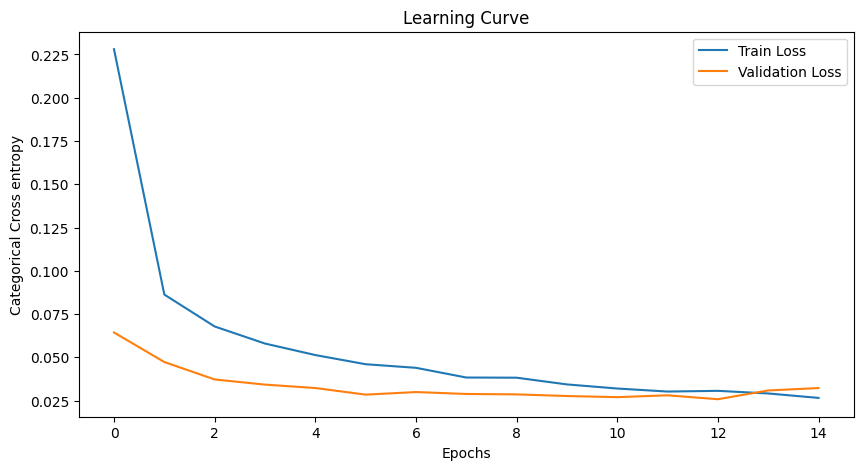

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Evaluate model in train and test

In [28]:
model.evaluate(xtrain_scl,ytrain_cat)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0128 - accuracy: 0.9962


[0.012764202430844307, 0.9961666464805603]

# Predict the probabiltyfor train and test

In [29]:
yprob_train = model.predict(xtrain_scl)
yprob_test = model.predict(xtest_scl)


313/313 [==============================] - 1s 2ms/step


In [30]:
yprob_train[0:5]

array([[2.1553259e-10, 1.4749644e-09, 1.6741572e-10, 2.6249992e-02,
        2.4335379e-11, 9.7374785e-01, 2.9885606e-12, 3.5546216e-07,
        1.5153779e-07, 1.7014137e-06],
       [9.9999940e-01, 8.7212513e-16, 2.4305194e-07, 2.5309775e-11,
        1.9846866e-10, 2.9708316e-11, 1.8237287e-07, 6.4886920e-12,
        4.2081787e-08, 9.2570801e-08],
       [1.7657187e-16, 8.0772695e-09, 3.1047165e-10, 1.7513349e-10,
        9.9999285e-01, 1.4901622e-10, 1.8654821e-13, 2.0437567e-06,
        2.4569289e-09, 5.1149627e-06],
       [1.6405502e-07, 9.9987042e-01, 2.9391267e-06, 7.1688895e-09,
        4.7554186e-05, 1.0538801e-08, 6.0592646e-07, 5.2323925e-05,
        2.4940584e-05, 1.0504775e-06],
       [1.6387911e-13, 1.8680078e-11, 3.6895087e-10, 2.5842915e-08,
        2.9007149e-05, 4.2856721e-10, 3.7908266e-16, 9.8207431e-07,
        2.5529528e-07, 9.9996972e-01]], dtype=float32)

In [31]:
yprob_train[0]

array([2.1553259e-10, 1.4749644e-09, 1.6741572e-10, 2.6249992e-02,
       2.4335379e-11, 9.7374785e-01, 2.9885606e-12, 3.5546216e-07,
       1.5153779e-07, 1.7014137e-06], dtype=float32)

# Prediction for train and test

In [32]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [33]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [34]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [35]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [36]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [37]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [38]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# Plot the confusion matrix

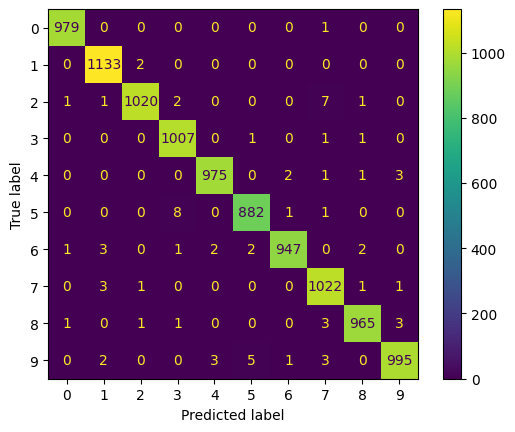

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

# print the classification report

In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Save the keras model for future use

In [41]:
model.save('HandwrittenModel.keras')


Load the above model

In [42]:
from keras.models import load_model
m = load_model('/content/HandwrittenModel.keras')
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0